# Importar Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Accesos en el panorama nacional y regional

Como se realizó en el notebook de Data Wrangling, se pueden llegar a los datos nacionales a partir de uno de los dataframes regionales, en este caso se usa el archivo de rangos de velocidad.

In [3]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
rango_velocidad_regional_unpivot.head()

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
0,2022,3,Buenos Aires,HASTA 512 kbps,29985
1,2022,3,Capital Federal,HASTA 512 kbps,517
2,2022,3,Catamarca,HASTA 512 kbps,71
3,2022,3,Chaco,HASTA 512 kbps,461
4,2022,3,Chubut,HASTA 512 kbps,109


In [4]:
nacional_accesos = rango_velocidad_regional_unpivot.groupby(["Año", "Trimestre"])['Accesos'].sum().reset_index().sort_values(by="Accesos", ascending=False)  
nacional_accesos.head()

,Año,Trimestre,Accesos
34,2022,3,11091128
33,2022,2,10958684
32,2022,1,10624009
31,2021,4,10489794
30,2021,3,10085541


Text(0.5, 1.0, 'Accesos por Año y Trimestre')

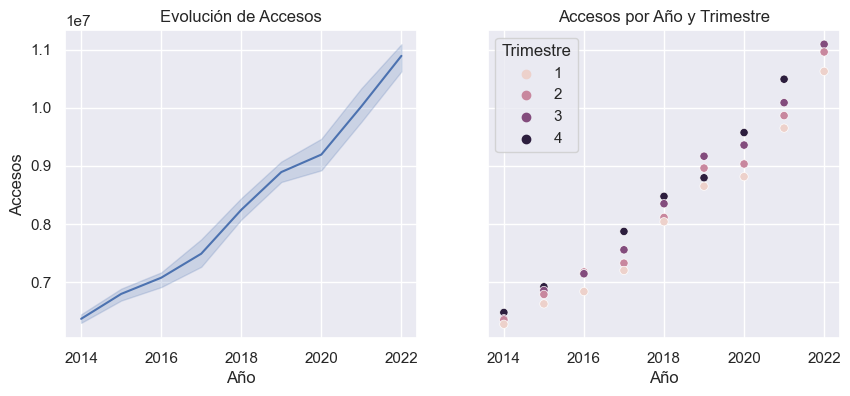

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.lineplot(data=nacional_accesos, x="Año", y="Accesos", ax=ax[0])
ax[0].set_xlabel('Año')
ax[0].set_title('Evolución de Accesos')

sns.scatterplot(data=nacional_accesos, x="Año", y="Accesos", hue="Trimestre", ax=ax[1])
ax[1].set_xlabel('Año')
ax[1].set_title('Accesos por Año y Trimestre')

La tendencia de los accesos es a subir cada año, con una pequeña anomalia en el 2019, donde en el 4to trimestre presenta menos accesos que en los primeros trimestres de ese mismo año. Ese comportamiento comportamiento solo se presenta ese año entonces es seguro decir que es solo un valor atipico que no aporta mucho al analisis general del acceso a internet en el pais.

También se puede observar que los puntos por cada trimestre se encuentran mas concentrados entre los años 2014 y 2016, esto muestra el poco progreso que hubo en esos años en terminos de cubertura si los comparamos en los años posteriores. En los graficos de distribución se puede observar mejor.

Text(0.5, 1.0, 'Diagrama de violin de Accesos por año')

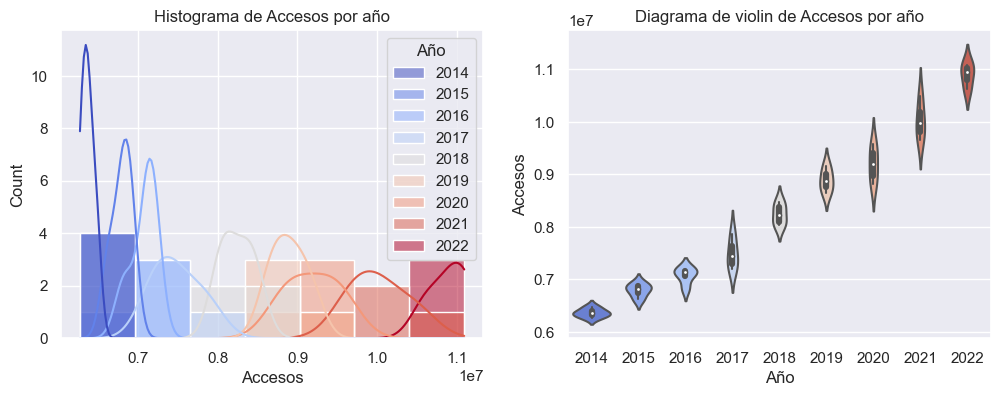

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=nacional_accesos, x="Accesos", hue="Año", palette="coolwarm", kde=True, ax=ax[0])
ax[0].set_xlabel('Accesos')
ax[0].set_title('Histograma de Accesos por año')

sns.violinplot(data=nacional_accesos, y="Accesos", x="Año", palette="coolwarm", ax=ax[1])
ax[1].set_xlabel('Año')
ax[1].set_title('Diagrama de violin de Accesos por año')

En el histograma se puede ver como se concentran los valores menores de Accesos para los primeros años del dataset, lo cual es esperable porque, como se mencionó anteriormente, el numero de accesos aumenta cada año, pero en el diagrama de violin se puede observar entre 2014 y 2016 como estan concentrados horizontalmente los datos, es decir, durante esos años hubo poco progreso (vertical) en ese periodo de tiempo, como se vió en el grafico de trimestres, mientras que en los años posteriores se ve como los valores y minimos de cada año estan mas separados y por lo tanto hubo mayores saltos de acceso a internet en esos periodos.

Para facilitar el analisis provincial, se agruparan las provincias en cuatro regiones principales: Noroeste (NOA), Nordeste(NEA), Central, Cuyo y Patagonia

In [14]:
regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index().sort_values(by="Accesos", ascending=False)  
regional_accesos.head()

,Provincia,Año,Trimestre,Accesos
34,Buenos Aires,2022,3,4721668
33,Buenos Aires,2022,2,4667183
32,Buenos Aires,2022,1,4555424
31,Buenos Aires,2021,4,4509157
30,Buenos Aires,2021,3,4251609


In [15]:
regional_accesos["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe',
       'Mendoza', 'Entre Ríos', 'Tucumán', 'Salta', 'Misiones', 'Chubut',
       'Neuquén', 'Río Negro', 'Corrientes', 'Chaco',
       'Santiago Del Estero', 'San Luis', 'Jujuy', 'La Pampa', 'San Juan',
       'La Rioja', 'Catamarca', 'Formosa', 'Tierra Del Fuego',
       'Santa Cruz'], dtype=object)

In [23]:
noa = ['Tucumán', 'Salta', 'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Catamarca']
nea = ['Corrientes', 'Chaco', 'Misiones', 'Formosa']
central = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe', 'Entre Ríos']
cuyo = ['Mendoza', 'San Luis', 'San Juan']
patagonia = ['Chubut','Neuquén', 'Río Negro', 'Tierra Del Fuego','Santa Cruz', 'La Pampa']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


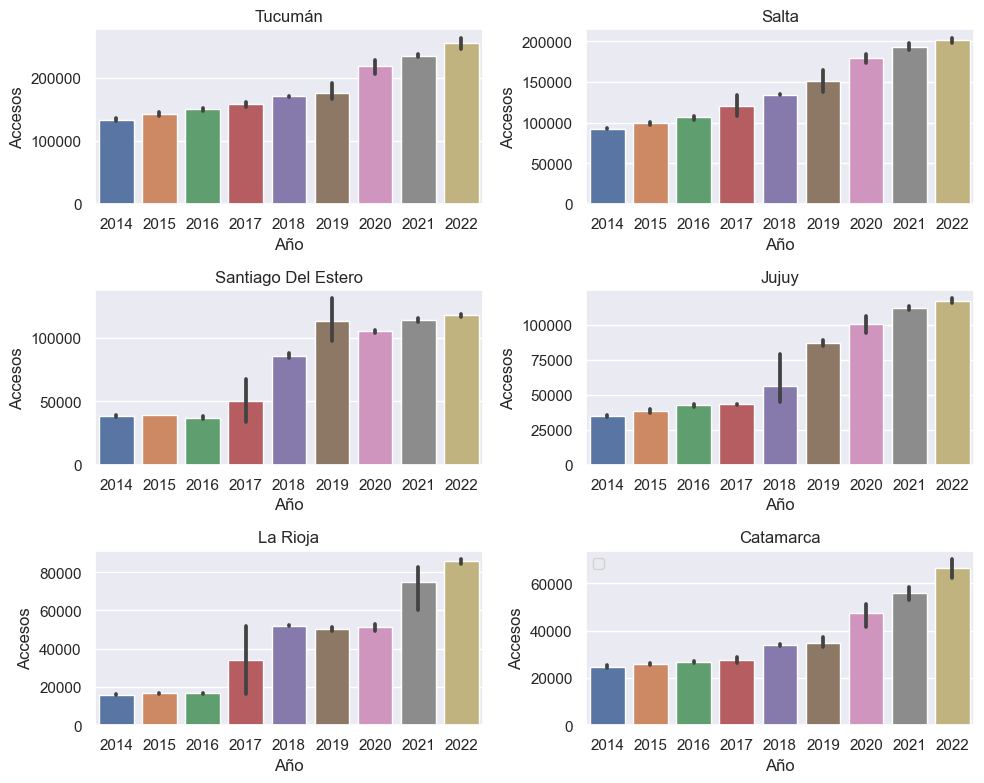

In [43]:
df_filtrado = regional_accesos[regional_accesos['Provincia'].isin(noa)]

# Configurar los subplots en función de la cantidad de provincias
num_provincias = len(noa)
num_columnas = 2
num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba


# Crear los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 8))
axes = axes.flatten()

# Iterar sobre las provincias y crear los gráficos de líneas en los subplots
for i, provincia in enumerate(noa):
    ax = axes[i]
    data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    sns.barplot(data=data_provincia, x="Año", y="Accesos", ax=ax)
    ax.set_title(provincia)

# Ajustar la disposición de los subplots y la leyenda
plt.tight_layout()
plt.legend(fontsize='small')

# Mostrar los subplots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


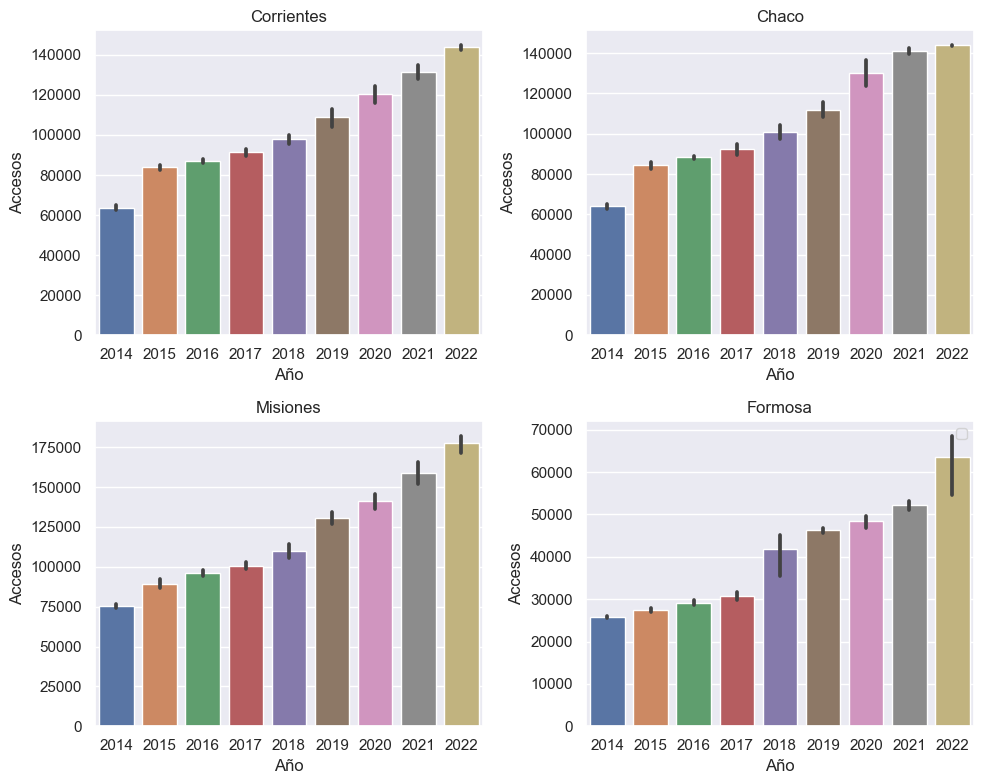

In [30]:
df_filtrado = regional_accesos[regional_accesos['Provincia'].isin(nea)]

# Configurar los subplots en función de la cantidad de provincias
num_provincias = len(nea)
num_columnas = 2
num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba


# Crear los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 8))
axes = axes.flatten()

# Iterar sobre las provincias y crear los gráficos de líneas en los subplots
for i, provincia in enumerate(nea):
    ax = axes[i]
    data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    sns.barplot(data=data_provincia, x="Año", y="Accesos", ax=ax)
    ax.set_title(provincia)

# Ajustar la disposición de los subplots y la leyenda
plt.tight_layout()
plt.legend(fontsize='small')

# Mostrar los subplots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


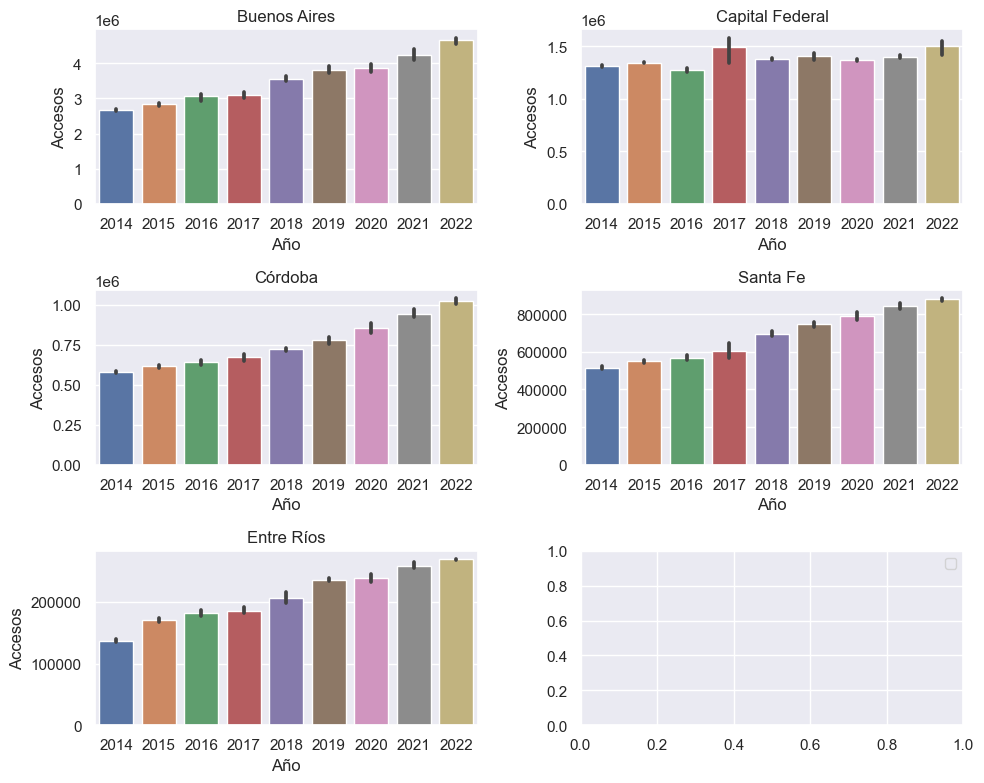

In [31]:
df_filtrado = regional_accesos[regional_accesos['Provincia'].isin(central)]

# Configurar los subplots en función de la cantidad de provincias
num_provincias = len(central)
num_columnas = 2
num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba


# Crear los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 8))
axes = axes.flatten()

# Iterar sobre las provincias y crear los gráficos de lícentrals en los subplots
for i, provincia in enumerate(central):
    ax = axes[i]
    data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    sns.barplot(data=data_provincia, x="Año", y="Accesos", ax=ax)
    ax.set_title(provincia)

# Ajustar la disposición de los subplots y la leyenda
plt.tight_layout()
plt.legend(fontsize='small')

# Mostrar los subplots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


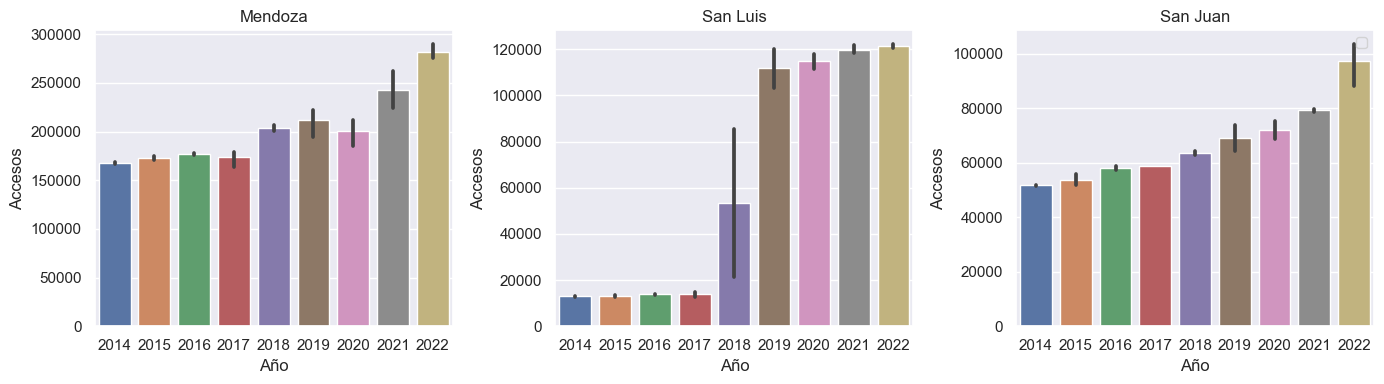

In [47]:
df_filtrado = regional_accesos[regional_accesos['Provincia'].isin(cuyo)]

# Configurar los subplots en función de la cantidad de provincias
num_provincias = len(cuyo)
num_columnas = 3
num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba


# Crear los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(14, 4))
axes = axes.flatten()

# Iterar sobre las provincias y crear los gráficos de lícentrals en los subplots
for i, provincia in enumerate(cuyo):
    ax = axes[i]
    data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    sns.barplot(data=data_provincia, x="Año", y="Accesos", ax=ax)
    ax.set_title(provincia)

# Ajustar la disposición de los subplots y la leyenda
plt.tight_layout()
plt.legend(fontsize='small')

# Mostrar los subplots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


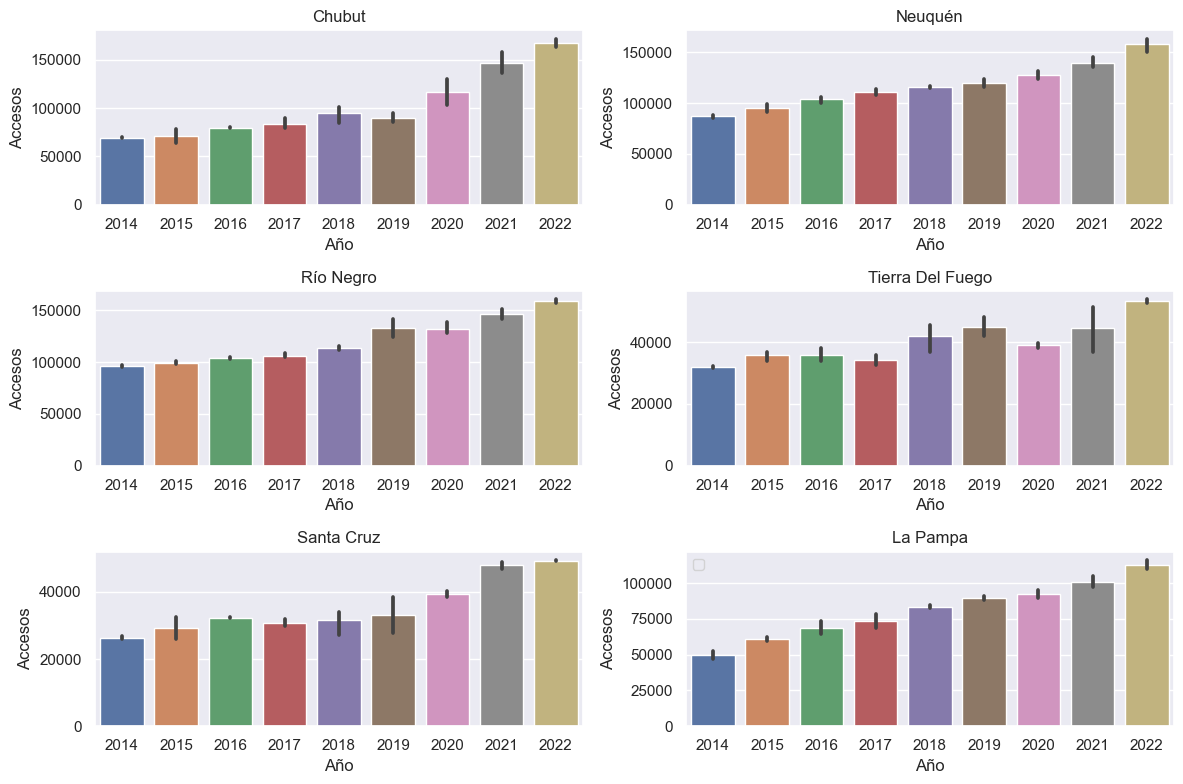

In [42]:
df_filtrado = regional_accesos[regional_accesos['Provincia'].isin(patagonia)]

# Configurar los subplots en función de la cantidad de provincias
num_provincias = len(patagonia)
num_columnas = 2
num_filas = int((num_provincias + 1) / num_columnas)  # Redondear hacia arriba


# Crear los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 8))
axes = axes.flatten()

# Iterar sobre las provincias y crear los gráficos de lícentrals en los subplots
for i, provincia in enumerate(patagonia):
    ax = axes[i]
    data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    sns.barplot(data=data_provincia, x="Año", y="Accesos", ax=ax)
    ax.set_title(provincia)

# Ajustar la disposición de los subplots y la leyenda
plt.tight_layout()
plt.legend(fontsize='small')

# Mostrar los subplots
plt.show()

# Rangos de velocidad de descarga

## Datos Nacionales

Se extraen los datos nacionales a partir de los datos regionales al igual que en la seccion anterior.

In [45]:
rango_velocidad_nacional_unpivot = rango_velocidad_regional_unpivot.groupby(["Año", "Trimestre", "Rango Velocidad"])['Accesos'].sum().reset_index().sort_values(by="Accesos", ascending=False)
rango_velocidad_nacional_unpivot.head()

,Año,Trimestre,Rango Velocidad,Accesos
275,2022,3,+ 30 Mbps,6995750
267,2022,2,+ 30 Mbps,6741922
259,2022,1,+ 30 Mbps,6336187
251,2021,4,+ 30 Mbps,6032322
16,2014,3,+ 1 Mbps - 6 Mbps,5153437


## Datos Regionales

In [ ]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
rango_velocidad_regional_unpivot.head()

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
0,2022,3,Buenos Aires,HASTA 512 kbps,29985
1,2022,3,Capital Federal,HASTA 512 kbps,517
2,2022,3,Catamarca,HASTA 512 kbps,71
3,2022,3,Chaco,HASTA 512 kbps,461
4,2022,3,Chubut,HASTA 512 kbps,109


In [ ]:
rango_velocidad_regional_unpivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              6714 non-null   int64 
 1   Trimestre        6714 non-null   int64 
 2   Provincia        6714 non-null   object
 3   Rango Velocidad  6714 non-null   object
 4   Accesos          6714 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 262.4+ KB


In [ ]:
rango_velocidad_regional_unpivot.isna().mean()

Año                0.0
Trimestre          0.0
Provincia          0.0
Rango Velocidad    0.0
Accesos            0.0
dtype: float64

In [ ]:
rango_velocidad_regional_unpivot.describe()

,Año,Trimestre,Accesos
count,6714.000000,6714.000000,6.714000e+03
mean,2017.884718,2.457551,4.303703e+04
std,2.528337,1.104842,1.856786e+05
min,2014.000000,1.000000,-1.945000e+03
25%,2016.000000,1.000000,6.700000e+01
50%,2018.000000,2.000000,3.376000e+03
75%,2020.000000,3.000000,2.312500e+04
max,2022.000000,4.000000,3.618689e+06


In [ ]:
rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot["Accesos"] < 0]

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
6035,2021,1,La Rioja,OTROS,-1
6043,2021,1,Santa Cruz,OTROS,-1945


<Axes: xlabel='Año', ylabel='Accesos'>

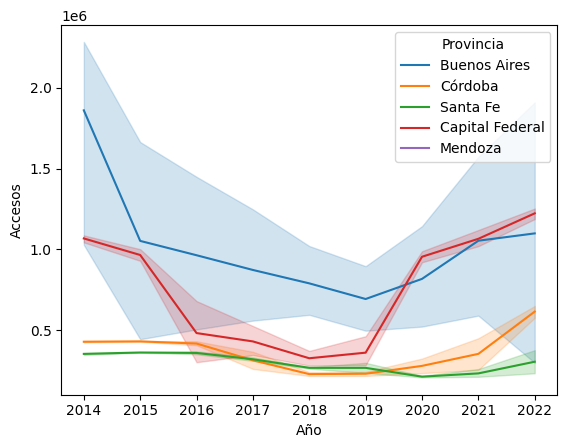

In [ ]:
umbral_accesos_1 = 200000

sns.lineplot(data=rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot['Accesos'] > umbral_accesos_1], x="Año", y="Accesos", hue="Provincia")
 

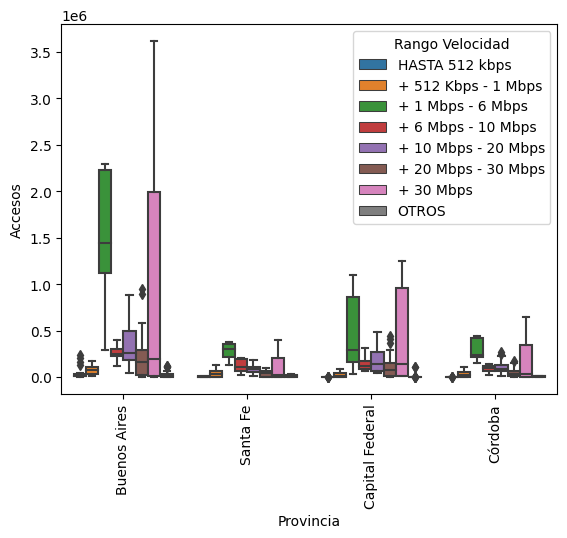

In [ ]:
umbral_accesos_1 = 300000

provincias_filtradas_mas_300000 = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot['Accesos'] > umbral_accesos_1]["Provincia"].unique()
sns.boxplot(data=rango_velocidad_regional_unpivot, x='Provincia', y='Accesos', hue="Rango Velocidad",order=provincias_filtradas_mas_300000)
plt.xticks(rotation=90)
plt.show()


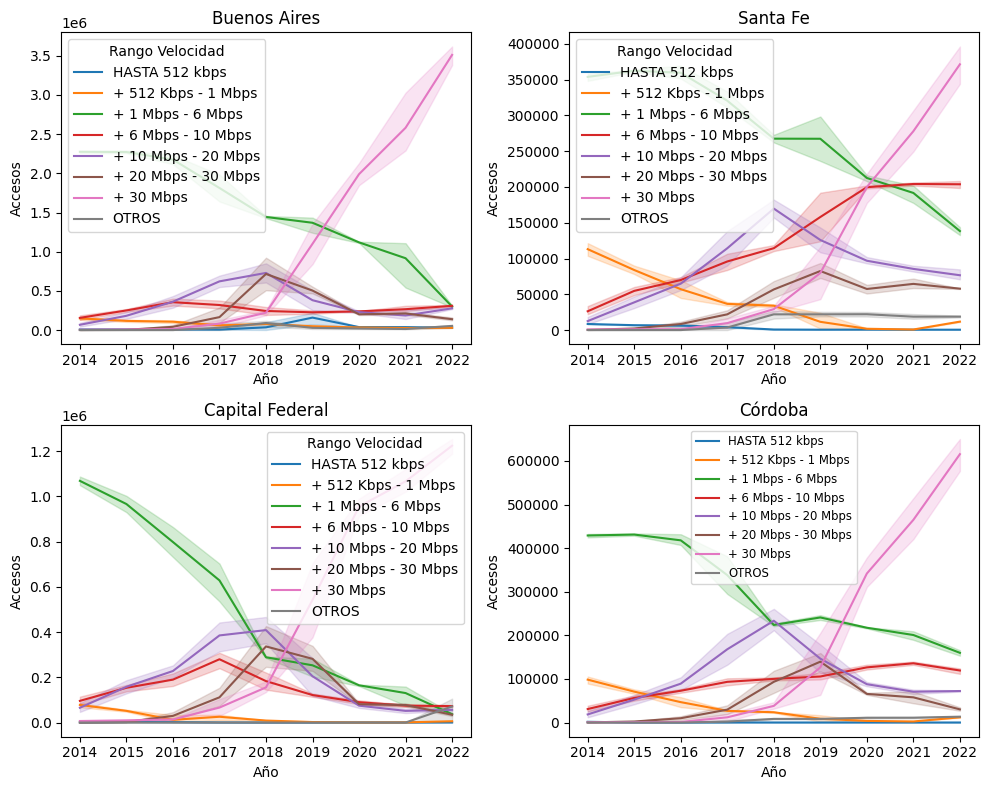

In [ ]:
df_filtrado = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot['Provincia'].isin(provincias_filtradas_mas_300000)]

# Configurar los subplots en función de la cantidad de provincias
num_provincias = len(provincias_filtradas_mas_300000)
num_filas = int((num_provincias + 1) / 2)  # Redondear hacia arriba
num_columnas = 2

# Crear los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 8))
axes = axes.flatten()

# Iterar sobre las provincias y crear los gráficos de líneas en los subplots
for i, provincia in enumerate(provincias_filtradas_mas_300000):
    ax = axes[i]
    data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    sns.lineplot(data=data_provincia, x="Año", y="Accesos", hue="Rango Velocidad", ax=ax)
    ax.set_title(provincia)

# Ajustar la disposición de los subplots y la leyenda
plt.tight_layout()
plt.legend(fontsize='small')

# Mostrar los subplots
plt.show()


In [ ]:
provincias_agrupadas = rango_velocidad_regional_unpivot.groupby(['Provincia'])['Accesos'].sum().reset_index().sort_values(by="Accesos", ascending=False)

In [ ]:
provincias_agrupadas

,Provincia,Accesos
0,Buenos Aires,122463311
1,Capital Federal,48426360
6,Córdoba,26263056
20,Santa Fe,23900428
7,Entre Ríos,7257454
12,Mendoza,7044861
23,Tucumán,6283421
16,Salta,4913843
15,Río Negro,4197965
13,Misiones,4140127


In [ ]:
umbral_accesos_1 = 1500000

provincias_filtradas_mas_300000 = provincias_agrupadas[provincias_agrupadas['Accesos'] < umbral_accesos_1]["Provincia"].unique()

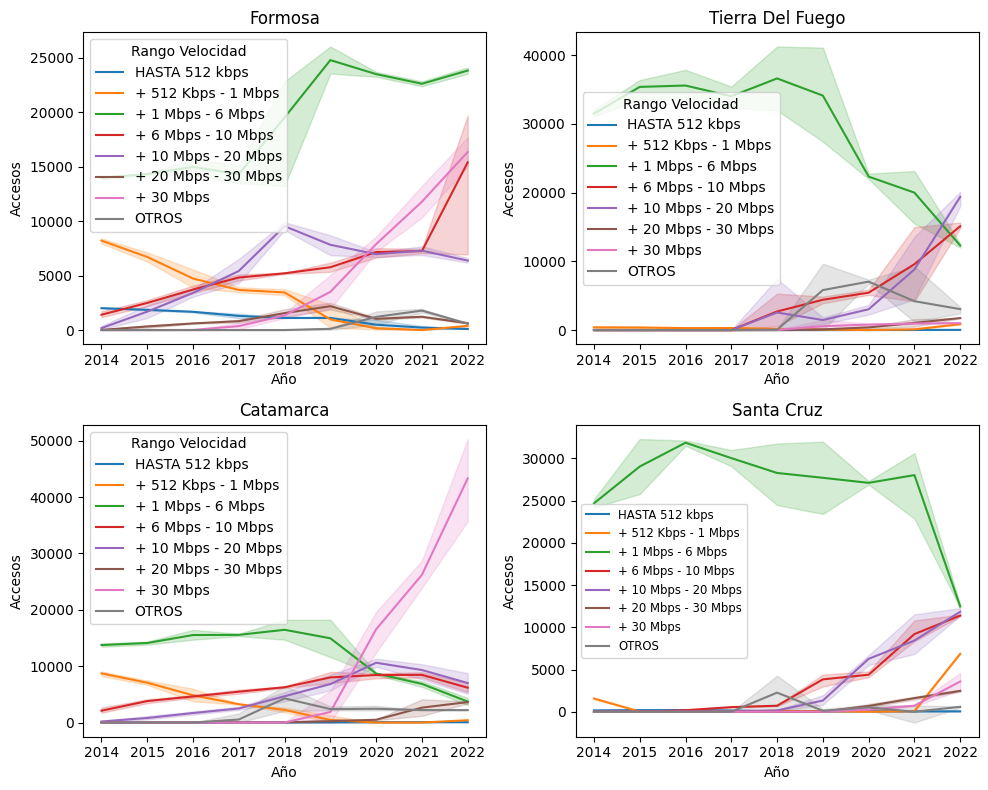

In [ ]:
df_filtrado = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot['Provincia'].isin(provincias_filtradas_mas_300000)]

# Configurar los subplots en función de la cantidad de provincias
num_provincias = len(provincias_filtradas_mas_300000)
num_filas = int((num_provincias + 1) / 2)  # Redondear hacia arriba
num_columnas = 2

# Crear los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 8))
axes = axes.flatten()

# Iterar sobre las provincias y crear los gráficos de líneas en los subplots
for i, provincia in enumerate(provincias_filtradas_mas_300000):
    ax = axes[i]
    data_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
    sns.lineplot(data=data_provincia, x="Año", y="Accesos", hue="Rango Velocidad", ax=ax)
    ax.set_title(provincia)

# Ajustar la disposición de los subplots y la leyenda
plt.tight_layout()
plt.legend(fontsize='small')

# Mostrar los subplots
plt.show()

## Datos nacionales

In [3]:
rango_velocidad_nacional_unpivot = pd.read_csv("../processed_data/rango_velocidad_nacional_unpivot.csv")
rango_velocidad_nacional_unpivot.head()

,Año,Trimestre,Rango Velocidad,Accesos
0,2022,3,Hasta 512 kbps,33013
1,2022,2,Hasta 512 kbps,33667
2,2022,1,Hasta 512 kbps,34890
3,2021,4,Hasta 512 kbps,41262
4,2021,3,Hasta 512 kbps,40174


In [32]:
rango_velocidad_nacional_unpivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              280 non-null    int64 
 1   Trimestre        280 non-null    int64 
 2   Rango Velocidad  280 non-null    object
 3   Accesos          280 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.9+ KB


In [33]:
rango_velocidad_nacional_unpivot.isna().mean() # proporcios de nulos

Año                0.0
Trimestre          0.0
Rango Velocidad    0.0
Accesos            0.0
dtype: float64

In [34]:
rango_velocidad_nacional_unpivot.describe()

,Año,Trimestre,Accesos
count,280.000000,280.000000,2.800000e+02
mean,2017.885714,2.457143,1.031966e+06
std,2.531764,1.106329,1.493611e+06
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,1.000000,4.364125e+04
50%,2018.000000,2.000000,4.500840e+05
75%,2020.000000,3.000000,1.084152e+06
max,2022.000000,4.000000,6.995750e+06


In [45]:
rango_velocidad_nacional_unpivot.groupby(['Año', 'Trimestre'])['Accesos'].describe() # informacion estadistica teniendo en cuenta los trimestres

count         mean           std       min        25%  \
Año  Trimestre                                                          
2014 1            8.0   784105.750  1.771639e+06       0.0    8782.50   
     2            8.0   793593.125  1.774862e+06       0.0    9313.75   
     3            8.0   795958.875  1.774158e+06       0.0    9444.75   
     4            8.0   809435.625  1.742074e+06       0.0   12514.50   
2015 1            8.0   827901.500  1.751031e+06       0.0   14171.00   
     2            8.0   848263.125  1.752681e+06       0.0   16408.00   
     3            8.0   856623.500  1.732360e+06       0.0   18783.00   
     4            8.0   864595.750  1.717131e+06       0.0   21019.50   
2016 1            8.0   854410.625  1.680413e+06       0.0   26593.00   
     2            8.0   896558.000  1.714068e+06       0.0   40261.00   
     3            8.0   892740.625  1.632017e+06       0.0   28292.50   
     4            8.0   893087.000  1.584069e+06       0.0   34123.50   
2017 1            8.0   899877.250  1.552296e+06       0.0   41155.75   
     2            8.0   915464.625  1.497242e+06       0.0   79567.75   
     3            8.0   944203.625  1.376733e+06       0.0  168253.25   
     4            8.0   983777.750  1.258461e+06   15041.0  204891.75   
2018 1            8.0  1004631.625  1.125785e+06    7309.0  231289.50   
     2            8.0  1013805.500  1.113123e+06    5972.0  233708.00   
     3            8.0  1043379.375  1.133882e+06    5675.0  204560.50   
     4            8.0  1059206.875  1.095989e+06  138740.0  188994.00   
2019 1            8.0  1081016.875  1.086234e+06  126570.0  188422.75   
     2            8.0  1120022.625  1.098439e+06   95980.0  236684.75   
     3            8.0  1145585.500  1.130257e+06   80599.0  243028.50   
     4            8.0  1099147.625  1.134878e+06   28980.0  160352.50   
2020 1            8.0  1101553.250  1.287538e+06   42550.0  159701.50   
     2            8.0  1128882.000  1.346313e+06   41038.0  157678.50   
     3            8.0  1169524.875  1.439354e+06   41038.0  162334.00   
     4            8.0  1196445.250  1.490267e+06   39510.0  149372.75   
2021 1            8.0  1205996.500  1.528930e+06   39487.0  150516.25   
     2            8.0  1232885.500  1.606819e+06   40172.0  136032.75   
     3            8.0  1260692.625  1.702770e+06   40174.0  132811.00   
     4            8.0  1311224.250  1.981633e+06   28521.0  156003.75   
2022 1            8.0  1328001.125  2.082032e+06   34890.0  174959.75   
     2            8.0  1369835.500  2.216888e+06   33667.0  288570.00   
     3            8.0  1386391.000  2.307757e+06   33013.0  285958.00   

                      50%         75%        max  
Año  Trimestre                                    
2014 1            76905.5   388791.25  5130294.0  
     2            94168.5   420368.75  5149574.0  
     3           109956.5   432033.50  5153437.0  
     4           160164.5   510875.50  5084556.0  
2015 1           194630.0   530594.25  5121423.0  
     2           236742.5   536491.25  5138431.0  
     3           245403.5   579857.25  5087802.0  
     4           230818.5   660943.25  5049640.0  
2016 1           217619.0   671984.25  4944358.0  
     2           229099.0   788568.75  5058481.0  
     3           209488.5   923539.25  4816081.0  
     4           201460.0   987827.75  4673339.0  
2017 1           220413.5  1013767.00  4584534.0  
     2           227185.0  1078210.75  4416065.0  
     3           299635.0  1195183.50  4062226.0  
     4           484752.5  1186747.00  3773159.0  
2018 1           629993.5  1249738.75  3272724.0  
     2           711903.5  1226486.75  3316868.0  
     3           692095.0  1580553.25  3401277.0  
     4           740983.5  1526662.50  3337982.0  
2019 1          1010782.0  1299348.25  3428759.0  
     2          1020387.0  1357232.00  3444458.0  
     3           916662.5  1434883.25  3309137.0  
     4           927851.0  1482672.75  

Text(0.5, 1.0, 'Distribution of runtime')

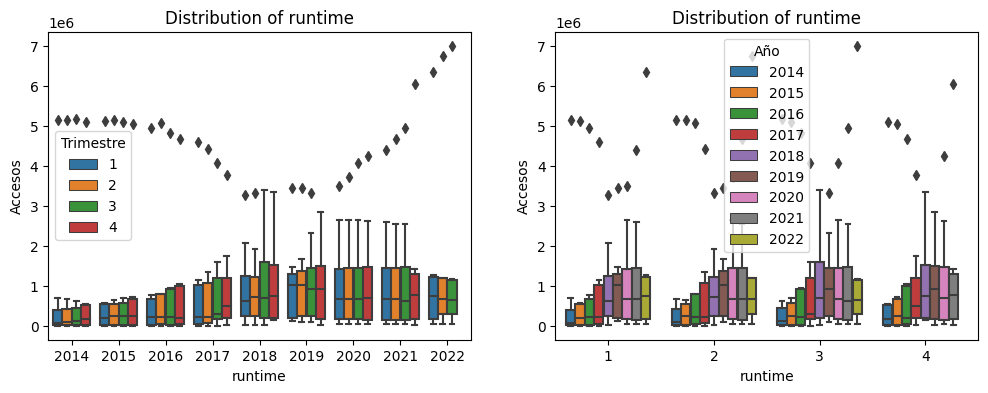

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=rango_velocidad_nacional_unpivot, x='Año', y='Accesos', hue='Trimestre', ax=ax[0])
ax[0].set_xlabel('runtime')
ax[0].set_title('Distribution of runtime')

sns.boxplot(data=rango_velocidad_nacional_unpivot, x='Trimestre', y='Accesos', hue='Año', ax=ax[1])
ax[1].set_xlabel('runtime')
ax[1].set_title('Distribution of runtime')

Text(0.5, 1.0, 'Distribution of runtime')

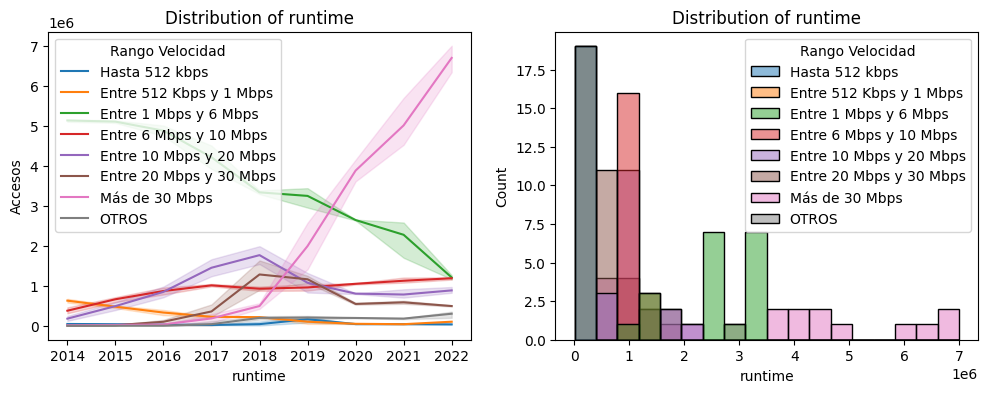

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=rango_velocidad_nacional_unpivot, x="Año", y="Accesos", hue="Rango Velocidad", ax=ax[0])
ax[0].set_xlabel('runtime')
ax[0].set_title('Distribution of runtime')

sns.histplot(data=rango_velocidad_nacional_unpivot[rango_velocidad_nacional_unpivot["Año"] > 2017], x='Accesos', hue="Rango Velocidad", ax=ax[1])
ax[1].set_xlabel('runtime')
ax[1].set_title('Distribution of runtime')

# Covertura y Velocidad Media

## Datos nacionales

In [21]:
penetracion_velocidad_nacional_internet_fijo = pd.read_csv("../processed_data/penetracion_velocidad_nacional_internet_fijo.csv")
penetracion_velocidad_nacional_internet_fijo.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Mbps (Media de bajada)
0,2022,3,76.64,23.95,62.46
1,2022,2,75.97,23.72,58.44
2,2022,1,73.88,23.05,55.11
3,2021,4,73.18,22.81,52.34
4,2021,3,70.58,21.98,48.46


In [22]:
penetracion_velocidad_nacional_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Mbps (Media de bajada)        35 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.5 KB


In [23]:
penetracion_velocidad_nacional_internet_fijo.isna().mean()

Año                             0.0
Trimestre                       0.0
Accesos por cada 100 hogares    0.0
Accesos por cada 100 hab        0.0
Mbps (Media de bajada)          0.0
dtype: float64

In [24]:
penetracion_velocidad_nacional_internet_fijo.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Mbps (Media de bajada)
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286,21.827143
std,2.564135,1.120474,8.148909,2.662968,19.230717
min,2014.000000,1.000000,49.550000,15.050000,3.620000
25%,2016.000000,1.500000,52.985000,16.245000,5.250000
50%,2018.000000,2.000000,59.160000,18.240000,13.850000
75%,2020.000000,3.000000,66.050000,20.475000,39.495000
max,2022.000000,4.000000,76.640000,23.950000,62.460000


Text(0.5, 1.0, 'Distribution of Accesos por cada 100 hab')

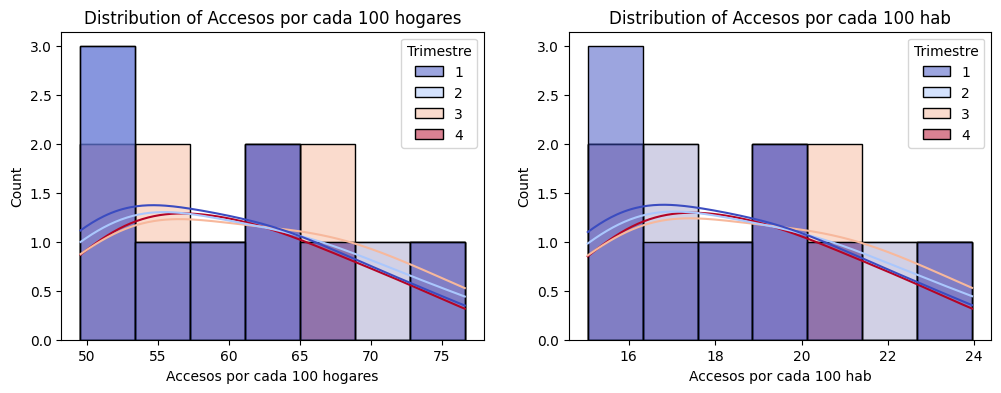

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=penetracion_velocidad_nacional_internet_fijo, x="Accesos por cada 100 hogares", hue="Trimestre", ax=ax[0], kde=True, palette="coolwarm")
ax[0].set_xlabel('Accesos por cada 100 hogares')
ax[0].set_title('Distribution of Accesos por cada 100 hogares')


sns.histplot(data=penetracion_velocidad_nacional_internet_fijo, x="Accesos por cada 100 hab", hue="Trimestre", ax=ax[1], kde=True, palette="coolwarm")
ax[1].set_xlabel('Accesos por cada 100 hab')
ax[1].set_title('Distribution of Accesos por cada 100 hab')

## For regional data

In [2]:
general_nacional= pd.read_csv("../processed_data/general_nacional.csv")

c:\Users\ASUS X515\Documents\Programacion_Data\proyectos\argentinian-telecommunications-analysis\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


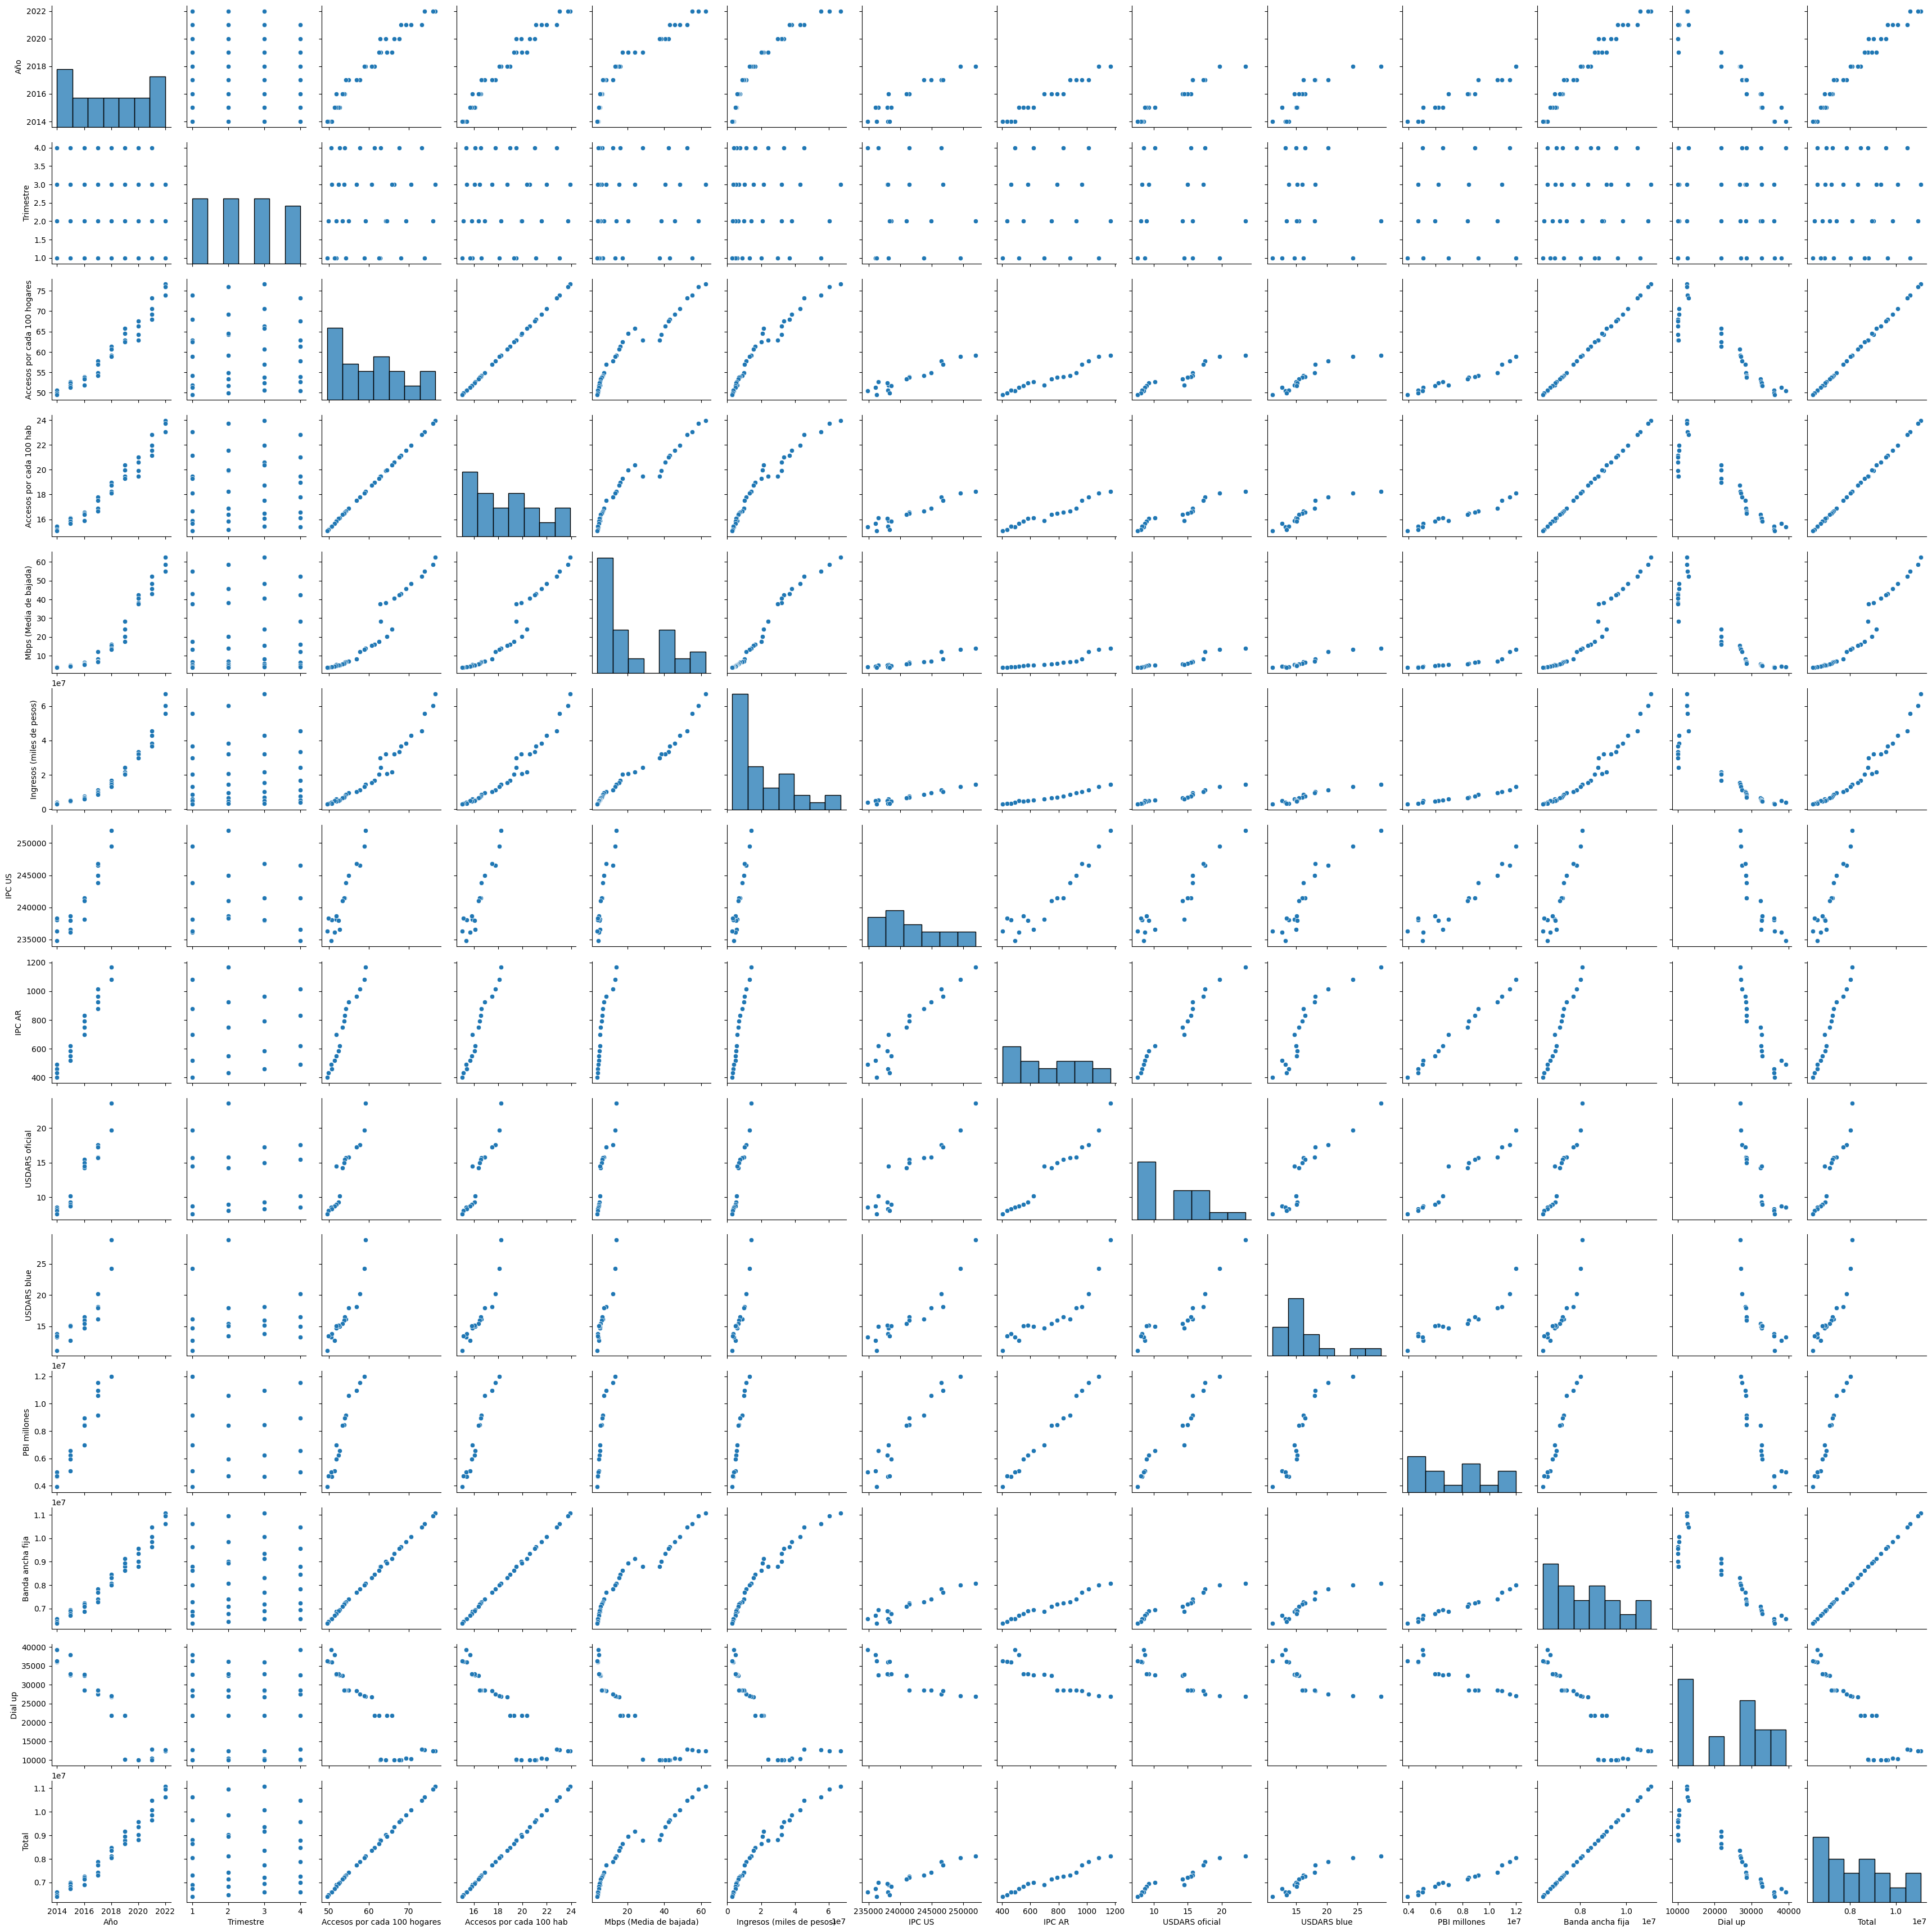

In [3]:
sns.pairplot(data=general_nacional)